# INFO 5613 – Class 09: Local-level metrics

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)

## Import libraries

In [2]:
# Load networkx for working with network data
import networkx as nx

# Load numpy for working with numerical data
import numpy as np

# Load pandas for working with tabular data
import pandas as pd

# Load visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sb

import os
import random

# Define a formatting string we can use to print the number of nodes and edges
node_edge_s = "There are {0:,} nodes and {1:,} edges in the network"

## Load and examine data

### Ugandan village friendships
We'll use friendship data from [Chami, Ahnert, Kabatereine, & Tukahebwa (2017)](https://www-pnas-org.colorado.idm.oclc.org/content/114/36/E7425.abstract) that was collected from 17 villages in Uganda ([original data](https://www.repository.cam.ac.uk/handle/1810/270256?show=full)). We typically think of friendship relations as *undirected* because a friendship only exists if both sides agree it does. But in survey data like this, person X can report they are friends with person Y without person Y reporting they are friends with person X (awkward!), so we will treat it as a directed graph.

This data also has an interesting anomaly: no node has an out-degree greater than 10. This is an artifact of the survey data collection strategy which likely limited respondents to naming no more than 10 friends. This may cause some problems for some of the statistics we look at later!

Load the first network and report out some basic statistics.

In [3]:
g01 = nx.read_edgelist('ugandan_friends/1',delimiter=',',create_using=nx.DiGraph)
print(node_edge_s.format(g01.number_of_nodes(),g01.number_of_edges()))

There are 203 nodes and 579 edges in the network


Make a hairball because we're network scientists.

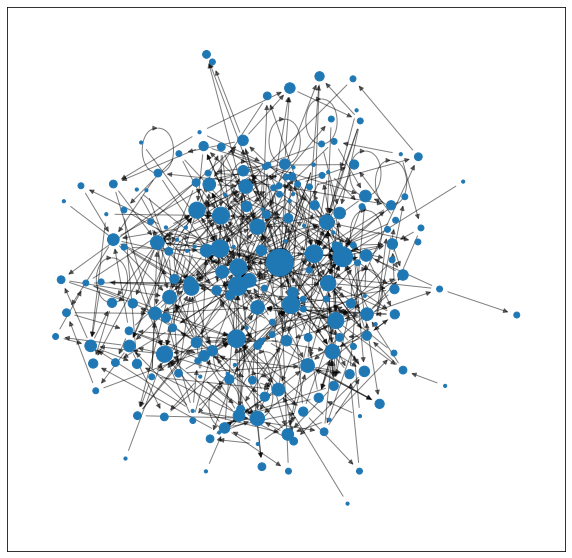

In [4]:
# Make an empty figure and axis to fill
f,ax = plt.subplots(figsize=(10,10))

# Calculate the node positions
pos = nx.drawing.kamada_kawai_layout(G = g01,scale=100)

# Calculate the nodes' in-degree centrality and scale for visualization purposes
idc_g01 = [10+(c*(len(g01) - 1)*25) for n,c in nx.in_degree_centrality(g01).items()]

# Draw the nodes
nx.draw_networkx_nodes(
    G = g01,
    node_size = idc_g01,
    pos = pos,
    ax = ax
)

# Draw the edges
nx.draw_networkx_edges(
    G = g01,
    pos = pos,
    alpha = .5,
    ax = ax
);

Load all the networks and store in a dictionary.

In [5]:
# Empty container we'll store data in
graph_dict = {}

# For each file in the director
for f in os.listdir('ugandan_friends/'):
    
    # Load the edgelist file and convert it into a directed graph
    _g = nx.read_edgelist('ugandan_friends/{0}'.format(f),delimiter=',',create_using=nx.DiGraph)
    
    # The network includes self-loops: people report being friends with themselves. We should remove these.
    _self_loops = nx.selfloop_edges(_g)
    _g.remove_edges_from(_self_loops)
    
    # Store the graph in the dictionary using the filename as a key
    graph_dict[f] = _g
    
    # Print out the number of nodes and edges in the network
    print("There are {0:,} nodes and {1:,} edges in network {2}.".format(_g.number_of_nodes(),_g.number_of_edges(),f))

There are 203 nodes and 558 edges in network 1.
There are 207 nodes and 1,122 edges in network 10.
There are 250 nodes and 1,111 edges in network 11.
There are 229 nodes and 891 edges in network 12.
There are 183 nodes and 833 edges in network 13.
There are 124 nodes and 554 edges in network 14.
There are 120 nodes and 284 edges in network 15.
There are 372 nodes and 1,407 edges in network 16.
There are 65 nodes and 286 edges in network 17.
There are 182 nodes and 709 edges in network 2.
There are 192 nodes and 1,103 edges in network 3.
There are 320 nodes and 2,127 edges in network 4.
There are 184 nodes and 759 edges in network 5.
There are 139 nodes and 670 edges in network 6.
There are 121 nodes and 820 edges in network 7.
There are 369 nodes and 1,792 edges in network 8.
There are 178 nodes and 1,129 edges in network 9.


### Game of Thrones character co-occurrence

Also load the *Game of Thrones* season 1 character co-occurrence data as an example of an undirected social network.

In [6]:
got_g = nx.read_gexf('got_s1.gexf')
print(node_edge_s.format(got_g.number_of_nodes(),got_g.number_of_edges()))

There are 118 nodes and 838 edges in the network


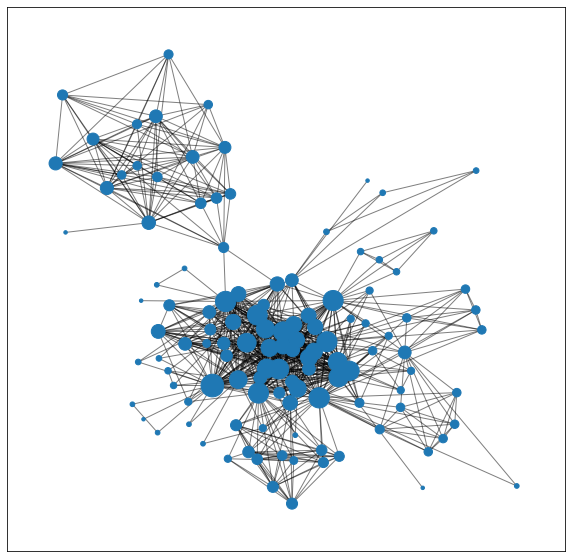

In [7]:
# Make an empty figure and axis to fill
f,ax = plt.subplots(figsize=(10,10))

# Calculate the node positions
pos = nx.drawing.kamada_kawai_layout(G = got_g,scale=100)

# Calculate the nodes' in-degree centrality and scale for visualization purposes
dc_got = [2+(c*(len(got_g) - 1)*10) for n,c in nx.degree_centrality(got_g).items()]

# Draw the nodes
nx.draw_networkx_nodes(
    G = got_g,
    node_size = dc_got,
    pos = pos,
    ax = ax
)

# Draw the edges
nx.draw_networkx_edges(
    G = got_g,
    pos = pos,
    alpha = .5,
    ax = ax
);

## Clustering

### Ugandan village friendships

In [8]:
clustering_g01 = nx.clustering(graph_dict['1'])

pd.Series(clustering_g01).sort_values(ascending=False).head(20)

6ab86631-56b2-4f4a-9c92-6c164dbc18cf    0.500000
49f19feb-5121-4a11-8007-b7b4fc2614bb    0.225000
412a9e83-dad6-4b4c-9071-e30a1799adcf    0.166667
8847ee09-d1b3-4fac-9cb6-cd02b2ac0df2    0.166667
ef9c4d61-f9de-40be-8950-dfd47c2d8490    0.166667
1f7a93ae-6b22-4d7a-babb-6444332e8684    0.166667
2e518c58-de8d-4e0c-9bc0-e4b53f4a9dfb    0.166667
15d8b689-6f05-4a17-a01a-f741ae0478ac    0.166667
33e47036-35e2-41fe-9ef6-7a73bc951db8    0.166667
c4feee70-85c4-498c-a7a0-3fdeaa98cdce    0.166667
0b634b39-f37e-4837-8629-8daab92ad163    0.166667
b1c88211-49cf-47e0-884b-81cad8c45fd4    0.150000
39847d71-9910-46a2-88d8-6b3de0549b4f    0.150000
ab68ce77-0a86-4d6c-9d69-256d54bf99a5    0.133333
003f752a-5755-4696-9bf1-b19dedfc457a    0.132353
21802042-a7fb-401a-a909-3b5f21d4755e    0.125000
a40cc39c-b686-4905-8cff-f908629a60dc    0.111111
5895dce3-ee27-440b-9009-61f2ab77ddb3    0.109091
26481ce1-e47f-4faf-ba64-f190c2f29b47    0.107143
26003298-5632-4252-a576-e84e6134d37e    0.100000
dtype: float64

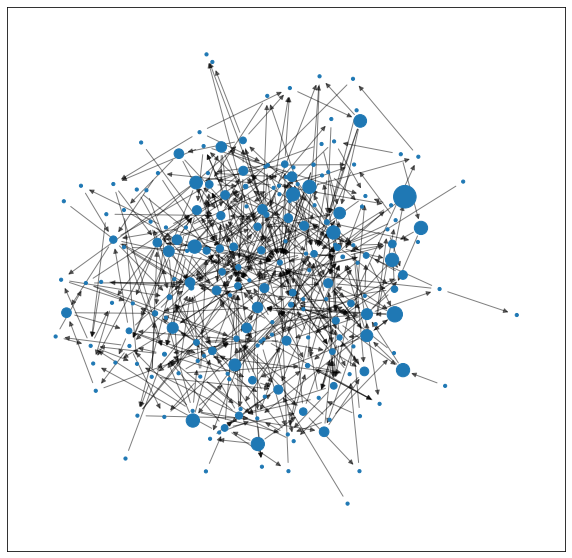

In [10]:
# Calculate the node positions
pos = nx.drawing.kamada_kawai_layout(
    G = graph_dict['1'],
    scale=100
)

# Scale the clustering for the purposes of visualization
clustering_g01_scaled = [10+(c*1000) for n,c in clustering_g01.items()]

# Make an empty figure and axis to fill
f,ax = plt.subplots(figsize=(10,10))

# Draw the nodes
nx.draw_networkx_nodes(
    G = graph_dict['1'],
    node_size = clustering_g01_scaled,
    pos = pos,
    ax = ax
)

# Draw the edges
nx.draw_networkx_edges(
    G = graph_dict['1'],
    pos = pos,
    alpha = .5,
    ax = ax
);

In [11]:
degree_clustering_d = {}

for _id,_g in graph_dict.items():
    _idc = {n:c*(len(_g) - 1) for n,c in nx.in_degree_centrality(_g).items()}
    _odc = {n:c*(len(_g) - 1) for n,c in nx.out_degree_centrality(_g).items()}
    _cluster = nx.clustering(_g)
    degree_clustering_d[_id] = pd.DataFrame({'In-degree':_idc,'Out-degree':_odc,'Clustering':_cluster})
    
degree_clustering_df = pd.concat(degree_clustering_d).reset_index(0)
degree_clustering_df.rename(columns={'level_0':'Network'},inplace=True)

degree_clustering_df.head()

,Network,In-degree,Out-degree,Clustering
49f19feb-5121-4a11-8007-b7b4fc2614bb,1,3.0,4.0,0.225000
003f752a-5755-4696-9bf1-b19dedfc457a,1,3.0,6.0,0.132353
412a9e83-dad6-4b4c-9071-e30a1799adcf,1,2.0,2.0,0.166667
cbf46d54-915b-4bbd-baf6-fffda78cf183,1,9.0,6.0,0.072115
7e177716-abe6-412c-a4b1-8980ddfe26a0,1,2.0,4.0,0.100000


Text(0.5, 1.0, 'Correlation: 0.155')

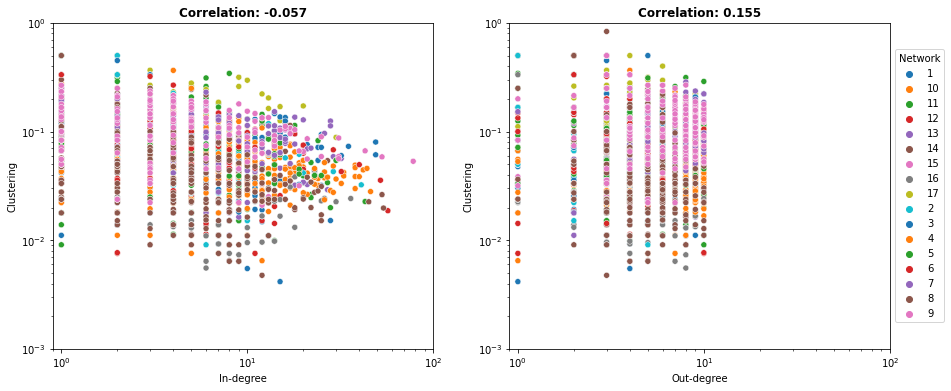

In [12]:
# Make an empty figure and axis to fill
f,axs = plt.subplots(1,2,figsize=(15,6))

# Plot in-degree on x-axis against clustering on y-axis on left sub-fig
sb.scatterplot(
    x = 'In-degree',
    y = 'Clustering',
    hue = 'Network',
    data = degree_clustering_df,
    palette = 'tab10',
    ax = axs[0],
    legend = False
)

# Plot out-degree on x-axis against clustering on y-axis on right sub-fig
sb.scatterplot(
    x = 'Out-degree',
    y = 'Clustering',
    hue = 'Network',
    data = degree_clustering_df,
    palette = 'tab10',
    ax = axs[1]
)

# Scale box sub-figs to same
for _ax in axs:
    _ax.set_xlim((.9e0,1e2))
    _ax.set_ylim((1e-3,1e0))
    _ax.set_xscale('log')
    _ax.set_yscale('log')

# Add legend
axs[1].legend(loc = 'center left', bbox_to_anchor = (1,.5), title = 'Network')

# Compute the correlations
idc_cluster_corr = degree_clustering_df[['In-degree','Clustering']].corr().iloc[0,1]
odc_cluster_corr = degree_clustering_df[['Out-degree','Clustering']].corr().iloc[0,1]

# Report correlations in sub-fig titles
axs[0].set_title("Correlation: {0:.3f}".format(idc_cluster_corr),fontweight='bold')
axs[1].set_title("Correlation: {0:.3f}".format(odc_cluster_corr),fontweight='bold')

### Game of Thrones character co-occurrence

In [13]:
degree_clustering_got_df = pd.DataFrame({
    'Degree': {n:c*(len(_g) - 1) for n,c in nx.degree_centrality(got_g).items()},
    'Clustering' : nx.clustering(got_g)
})

degree_clustering_got_df.head()

,Degree,Clustering
Gared,4.538462,1.000
Waymar Royce,4.538462,1.000
Will,24.205128,0.575
Wight Wildling Girl,1.512821,0.000
White Walker,4.538462,1.000


<AxesSubplot:xlabel='Degree', ylabel='Clustering'>

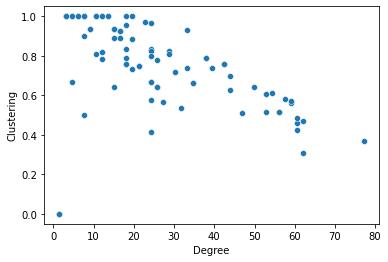

In [14]:
sb.scatterplot(x='Degree',y='Clustering',data=degree_clustering_got_df)

## Triad census

networkx's `triad_census` function takes a graph and returns a dictionary keyed by isomorphism class and valued by the count of that triad type in the network.

Here's a reminder of the isomorphism classes.

![Triad census](https://i.stack.imgur.com/9Xo0R.png)

In [16]:
graph_dict['1'].number_of_nodes()

203

In [19]:
(203*202*201)/6

1373701.0

In [22]:
np.array(list(nx.triadic_census(graph_dict['1']).values())).sum()

1373701

In [15]:
# Compute the triad census for a single network
nx.triadic_census(graph_dict['1'])

{'003': 1267644,
 '012': 100245,
 '102': 1998,
 '021D': 718,
 '021U': 1506,
 '021C': 1318,
 '111D': 134,
 '111U': 61,
 '030T': 53,
 '030C': 9,
 '201': 1,
 '120D': 7,
 '120U': 4,
 '120C': 1,
 '210': 2,
 '300': 0}

In [23]:
# Make a random network with the same number of nodes and edges
random_g01 = nx.gnm_random_graph(
    n = graph_dict['1'].number_of_nodes(),
    m = graph_dict['1'].number_of_edges(),
    directed = True
)

# Compute the triad census for this single random graph
nx.triadic_census(random_g01)

{'003': 1265364,
 '012': 104599,
 '102': 750,
 '021D': 688,
 '021U': 737,
 '021C': 1480,
 '111D': 30,
 '111U': 24,
 '030T': 22,
 '030C': 7,
 '201': 0,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 0}

We want to compare the triadic census of lots of random networks that are similar to the friend networks to the triadic censuses of the friend networks.

In [24]:
# Empty container to store censuses
random_graphs_triad_census_l = []

# While there are fewer than 100 censuses in the container
while len(random_graphs_triad_census_l) < 200:
    
    # Select one of thte 17 friend networks at random
    _choice_g = random.choice(list(graph_dict.values()))
    
    # Make a random network with the same number of nodes and edges
    _random_g = nx.gnm_random_graph(
        n = _choice_g.number_of_nodes(),
        m = _choice_g.number_of_edges(),
        directed = True
    )
    
    # Compute the triadic census on the random network
    _census = nx.triadic_census(_random_g)
    
    # Add the random network's census to the container
    random_graphs_triad_census_l.append(_census)
    
# Convert the container of triad censuses into a DataFrame
random_censuses_df = pd.DataFrame(random_graphs_triad_census_l).stack().reset_index(1)

# Rename columns
random_censuses_df.columns = ['Class','Count']

# Add a new column labeling the network type
random_censuses_df['Type'] = 'Random'

# Inspect
random_censuses_df.head(10)

,Class,Count,Type
0,003,862903,Random
0,012,133157,Random
0,102,1488,Random
0,021D,1691,Random
0,021U,1743,Random
0,021C,3481,Random
0,111D,62,Random
0,111U,73,Random
0,030T,103,Random
0,030C,24,Random


In [25]:
# Empty container to hold the friend network censuses
friend_census_d = {}

# For each friend network
for _id,_g in graph_dict.items():
    
    # Compute its census and add the census dictionary to the container
    friend_census_d[_id] = nx.triadic_census(_g)
    
    
# Convert the container of triad censuses into a DataFrame
friend_census_df = pd.DataFrame(friend_census_d).T.stack().reset_index(1).reset_index(drop=True)

# Rename columns
friend_census_df.columns = ['Class','Count']

# Add a new column labeling the network type
friend_census_df['Type'] = 'Friend'

# Inspect
friend_census_df.head(10)

,Class,Count,Type
0,003,1267644,Friend
1,012,100245,Friend
2,102,1998,Friend
3,021D,718,Friend
4,021U,1506,Friend
5,021C,1318,Friend
6,111D,134,Friend
7,111U,61,Friend
8,030T,53,Friend
9,030C,9,Friend


Some triadic structures---particularly those with a mutual tie---are significantly more common in the friend network than in similarly-sized random networks.

(0.0, 10000000.0)

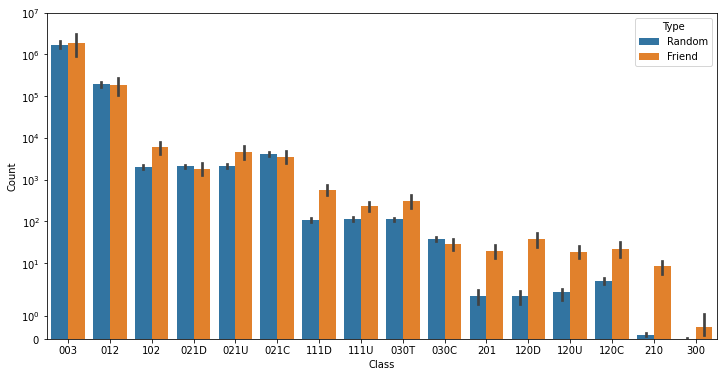

In [26]:
# Combine the random and friend network censuses together
comparing_census_df = pd.concat([random_censuses_df,friend_census_df]).reset_index(drop=True)

# Make an empty figure and axis
f,ax = plt.subplots(figsize=(12,6))

# Make side-by-side barplots with the class on x-axis and counts on y-axis
ax = sb.barplot(
    x = 'Class',
    y = 'Count',
    hue = 'Type',
    data = comparing_census_df,
    ax = ax
)

# Scale the y-axis
ax.set_yscale('symlog')
ax.set_ylim((0,1e7))

![Triad census](https://i.stack.imgur.com/9Xo0R.png)

## Degree assortativity

### Ugandan village friendships

In [27]:
idc_g01 = {n:round(idc * (len(graph_dict['1']) - 1)) for n,idc in nx.in_degree_centrality(graph_dict['1']).items()}
odc_g01 = {n:round(odc * (len(graph_dict['1']) - 1)) for n,odc in nx.out_degree_centrality(graph_dict['1']).items()}

avg_out_neighbor_out_degree_g01 = nx.average_neighbor_degree(graph_dict['1'],source='out',target='out')
avg_out_neighbor_in_degree_g01 = nx.average_neighbor_degree(graph_dict['1'],source='out',target='in')
avg_in_neighbor_out_degree_g01 = nx.average_neighbor_degree(graph_dict['1'],source='in',target='out')
avg_in_neighbor_in_degree_g01 = nx.average_neighbor_degree(graph_dict['1'],source='in',target='in')

In [28]:
neighbor_centrality_g01_df = pd.DataFrame({
    'In-degree centrality': idc_g01,
    'Out-degree centrality': odc_g01,
    'In-in neighbor centrality': avg_in_neighbor_in_degree_g01,
    'In-out neighbor centrality': avg_in_neighbor_out_degree_g01,
    'Out-in neighbor centrality': avg_out_neighbor_in_degree_g01,
    'Out-out neighbor centrality': avg_out_neighbor_out_degree_g01
})

neighbor_centrality_g01_df.head()

,In-degree centrality,Out-degree centrality,In-in neighbor centrality,In-out neighbor centrality,Out-in neighbor centrality,Out-out neighbor centrality
49f19feb-5121-4a11-8007-b7b4fc2614bb,3,4,7.666667,6.000000,5.750000,4.500000
003f752a-5755-4696-9bf1-b19dedfc457a,3,6,12.000000,9.333333,6.000000,4.666667
412a9e83-dad6-4b4c-9071-e30a1799adcf,2,2,4.000000,6.000000,4.000000,6.000000
cbf46d54-915b-4bbd-baf6-fffda78cf183,9,6,3.777778,3.000000,5.666667,4.500000
7e177716-abe6-412c-a4b1-8980ddfe26a0,2,4,18.000000,4.000000,9.000000,2.000000


Text(0.5, 1.0, 'Correlation: -0.005')

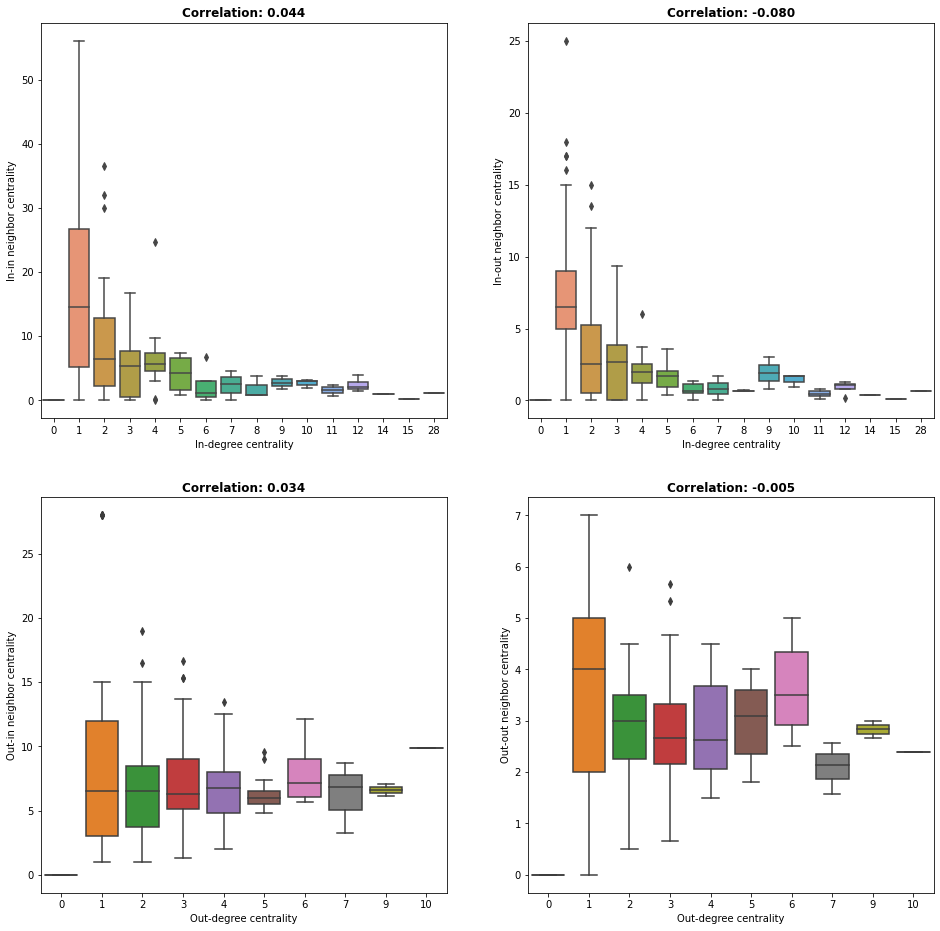

In [29]:
f,axs = plt.subplots(2,2,figsize=(16,16))

sb.boxplot(x='In-degree centrality',y='In-in neighbor centrality',data=neighbor_centrality_g01_df,ax=axs[0,0])
sb.boxplot(x='In-degree centrality',y='In-out neighbor centrality',data=neighbor_centrality_g01_df,ax=axs[0,1])
sb.boxplot(x='Out-degree centrality',y='Out-in neighbor centrality',data=neighbor_centrality_g01_df,ax=axs[1,0])
sb.boxplot(x='Out-degree centrality',y='Out-out neighbor centrality',data=neighbor_centrality_g01_df,ax=axs[1,1])

axs[0,0].set_title('Correlation: {0:.3f}'.format(nx.degree_assortativity_coefficient(graph_dict['1'],'in','in')),fontweight = 'bold')
axs[0,1].set_title('Correlation: {0:.3f}'.format(nx.degree_assortativity_coefficient(graph_dict['1'],'in','out')),fontweight = 'bold')
axs[1,0].set_title('Correlation: {0:.3f}'.format(nx.degree_assortativity_coefficient(graph_dict['1'],'out','in')),fontweight = 'bold')
axs[1,1].set_title('Correlation: {0:.3f}'.format(nx.degree_assortativity_coefficient(graph_dict['1'],'out','out')),fontweight = 'bold')

Text(0.5, 1.0, 'Correlation: 0.444')

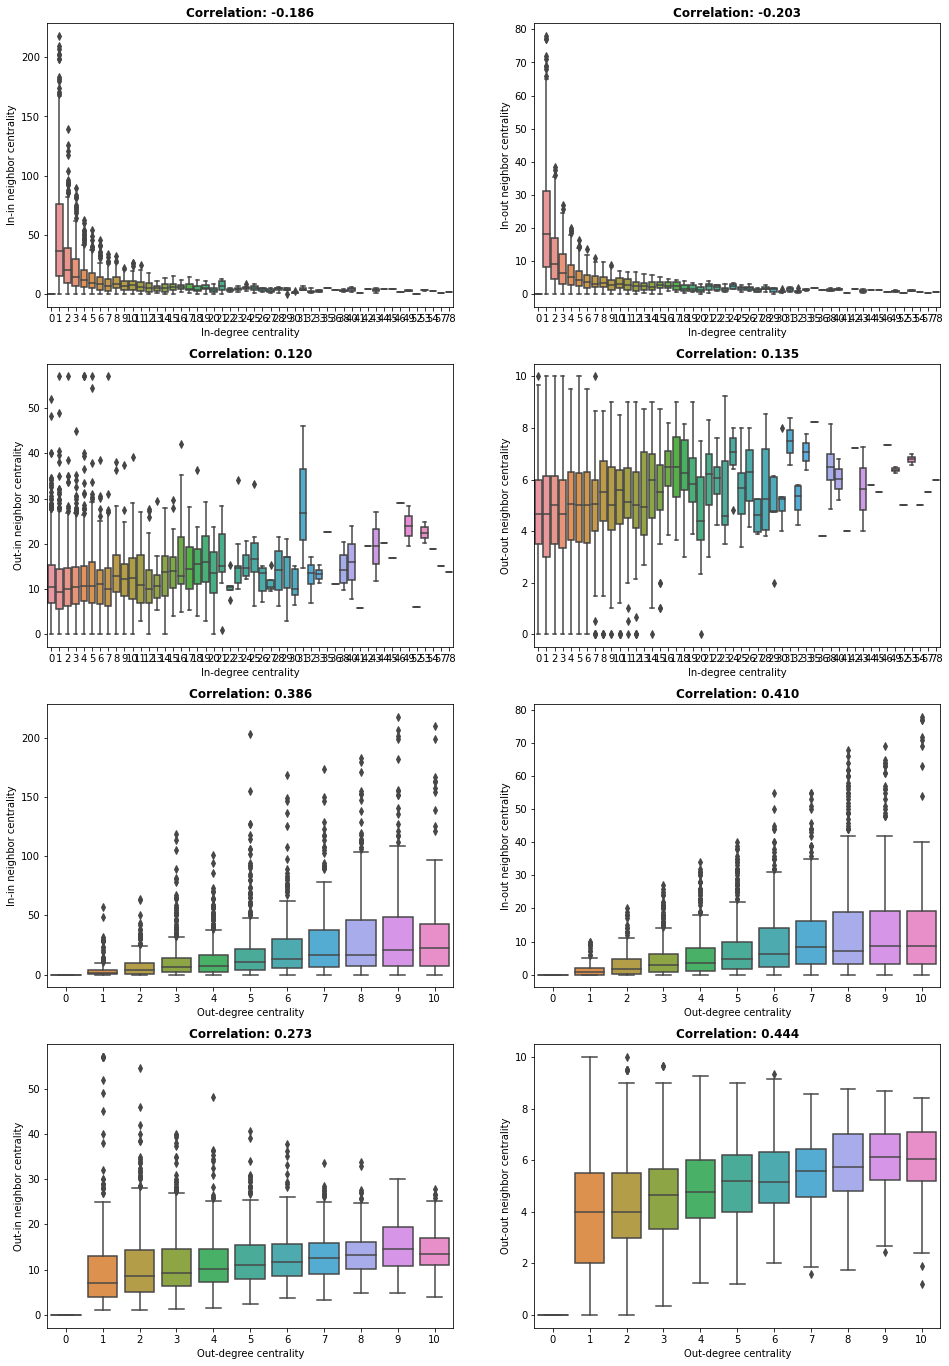

In [39]:
friend_neighbor_degrees_df_l = []


for _id,_g in graph_dict.items():
    
    _neighbor_centrality_df = pd.DataFrame({
        'In-degree centrality': {n:round(idc * (len(_g) - 1)) for n,idc in nx.in_degree_centrality(_g).items()},
        'Out-degree centrality': {n:round(odc * (len(_g) - 1)) for n,odc in nx.out_degree_centrality(_g).items()},
        'In-in neighbor centrality': nx.average_neighbor_degree(_g,source='in',target='in'),
        'In-out neighbor centrality': nx.average_neighbor_degree(_g,source='in',target='out'),
        'Out-in neighbor centrality': nx.average_neighbor_degree(_g,source='out',target='in'),
        'Out-out neighbor centrality': nx.average_neighbor_degree(_g,source='out',target='out')
    })
    
    friend_neighbor_degrees_df_l.append(_neighbor_centrality_df)

friend_neighbor_degrees_df = pd.concat(friend_neighbor_degrees_df_l)

f,axs = plt.subplots(4,2,figsize=(16,24))

sb.boxplot(x='In-degree centrality',y='In-in neighbor centrality',data=friend_neighbor_degrees_df,ax=axs[0,0])
sb.boxplot(x='In-degree centrality',y='In-out neighbor centrality',data=friend_neighbor_degrees_df,ax=axs[0,1])
sb.boxplot(x='In-degree centrality',y='Out-in neighbor centrality',data=friend_neighbor_degrees_df,ax=axs[1,0])
sb.boxplot(x='In-degree centrality',y='Out-out neighbor centrality',data=friend_neighbor_degrees_df,ax=axs[1,1])
           
sb.boxplot(x='Out-degree centrality',y='In-in neighbor centrality',data=friend_neighbor_degrees_df,ax=axs[2,0])
sb.boxplot(x='Out-degree centrality',y='In-out neighbor centrality',data=friend_neighbor_degrees_df,ax=axs[2,1])
sb.boxplot(x='Out-degree centrality',y='Out-in neighbor centrality',data=friend_neighbor_degrees_df,ax=axs[3,0])
sb.boxplot(x='Out-degree centrality',y='Out-out neighbor centrality',data=friend_neighbor_degrees_df,ax=axs[3,1])

axs[0,0].set_title('Correlation: {0:.3f}'.format(friend_neighbor_degrees_df[['In-degree centrality','In-in neighbor centrality']].corr().iloc[0,1]),fontweight = 'bold')
axs[0,1].set_title('Correlation: {0:.3f}'.format(friend_neighbor_degrees_df[['In-degree centrality','In-out neighbor centrality']].corr().iloc[0,1]),fontweight = 'bold')
axs[1,0].set_title('Correlation: {0:.3f}'.format(friend_neighbor_degrees_df[['In-degree centrality','Out-in neighbor centrality']].corr().iloc[0,1]),fontweight = 'bold')
axs[1,1].set_title('Correlation: {0:.3f}'.format(friend_neighbor_degrees_df[['In-degree centrality','Out-out neighbor centrality']].corr().iloc[0,1]),fontweight = 'bold')

axs[2,0].set_title('Correlation: {0:.3f}'.format(friend_neighbor_degrees_df[['Out-degree centrality','In-in neighbor centrality']].corr().iloc[0,1]),fontweight = 'bold')
axs[2,1].set_title('Correlation: {0:.3f}'.format(friend_neighbor_degrees_df[['Out-degree centrality','In-out neighbor centrality']].corr().iloc[0,1]),fontweight = 'bold')
axs[3,0].set_title('Correlation: {0:.3f}'.format(friend_neighbor_degrees_df[['Out-degree centrality','Out-in neighbor centrality']].corr().iloc[0,1]),fontweight = 'bold')
axs[3,1].set_title('Correlation: {0:.3f}'.format(friend_neighbor_degrees_df[['Out-degree centrality','Out-out neighbor centrality']].corr().iloc[0,1]),fontweight = 'bold')

### Game of Thrones character co-occurrence

In [31]:
neighbor_centrality_got_df = pd.DataFrame({
    'Degree centrality': {n:round(c*(len(_g) - 1)) for n,c in nx.degree_centrality(got_g).items()},
    'Average neighbor degree' : nx.average_neighbor_degree(got_g)
})

neighbor_centrality_got_df['Degree centrality cut'] = pd.cut(
    neighbor_centrality_got_df['Degree centrality'],
    bins=np.logspace(0,2,10)
)

neighbor_centrality_got_df.head()

,Degree centrality,Average neighbor degree,Degree centrality cut
Gared,5,7.333333,"(4.642, 7.743]"
Waymar Royce,5,7.333333,"(4.642, 7.743]"
Will,24,28.187500,"(21.544, 35.938]"
Wight Wildling Girl,2,16.000000,"(1.668, 2.783]"
White Walker,5,7.333333,"(4.642, 7.743]"


<AxesSubplot:xlabel='Degree centrality', ylabel='Average neighbor degree'>

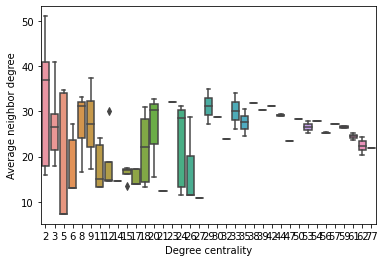

In [32]:
sb.boxplot(x='Degree centrality',y='Average neighbor degree',data=neighbor_centrality_got_df)

<AxesSubplot:xlabel='Degree centrality cut', ylabel='Average neighbor degree'>

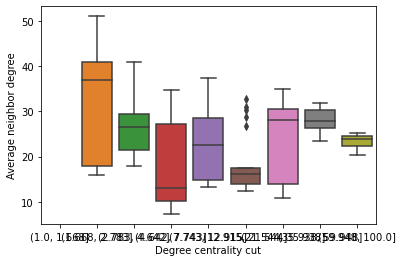

In [33]:
sb.boxplot(x='Degree centrality cut',y='Average neighbor degree',data=neighbor_centrality_got_df)

## Friendship paradox

In [40]:
# What's the average in-degree centrality in the friendship network?
friend_neighbor_degrees_df['In-degree centrality'].mean()

4.698952879581152

In [41]:
# What's the average out-degree centrality in the friendship network?
friend_neighbor_degrees_df['Out-degree centrality'].mean()

4.698952879581152

In [42]:
friend_neighbor_degrees_df.head()

,In-degree centrality,Out-degree centrality,In-in neighbor centrality,In-out neighbor centrality,Out-in neighbor centrality,Out-out neighbor centrality
49f19feb-5121-4a11-8007-b7b4fc2614bb,3,4,7.666667,6.000000,5.750000,4.500000
003f752a-5755-4696-9bf1-b19dedfc457a,3,6,12.000000,9.333333,6.000000,4.666667
412a9e83-dad6-4b4c-9071-e30a1799adcf,2,2,4.000000,6.000000,4.000000,6.000000
cbf46d54-915b-4bbd-baf6-fffda78cf183,9,6,3.777778,3.000000,5.666667,4.500000
7e177716-abe6-412c-a4b1-8980ddfe26a0,2,4,18.000000,4.000000,9.000000,2.000000


In [44]:
# What fraction of nodes have an in-degree centrality greater than the average in-degree centrality?
_bool = friend_neighbor_degrees_df['In-degree centrality'] < friend_neighbor_degrees_df['In-degree centrality'].mean()
len(friend_neighbor_degrees_df[_bool])/len(friend_neighbor_degrees_df)

0.6596858638743456

In [45]:
# What fraction of nodes have an out-degree centrality greater than the average out-degree centrality?
_bool = friend_neighbor_degrees_df['Out-degree centrality'] < friend_neighbor_degrees_df['Out-degree centrality'].mean()
len(friend_neighbor_degrees_df[_bool])/len(friend_neighbor_degrees_df)

0.5250145433391507

Explore this paradox through the average neighbor degrees.

In [46]:
inin_bool = friend_neighbor_degrees_df['In-in neighbor centrality'] > friend_neighbor_degrees_df['In-degree centrality']
len(friend_neighbor_degrees_df[inin_bool])/len(friend_neighbor_degrees_df)

0.5619546247818499

In [47]:
inout_bool = friend_neighbor_degrees_df['In-out neighbor centrality'] > friend_neighbor_degrees_df['In-degree centrality']
len(friend_neighbor_degrees_df[inout_bool])/len(friend_neighbor_degrees_df)

0.43106457242582896

In [48]:
outin_bool = friend_neighbor_degrees_df['Out-in neighbor centrality'] > friend_neighbor_degrees_df['Out-degree centrality']
len(friend_neighbor_degrees_df[outin_bool])/len(friend_neighbor_degrees_df)

0.8903432228039558

In [49]:
outout_bool = friend_neighbor_degrees_df['Out-out neighbor centrality'] > friend_neighbor_degrees_df['Out-degree centrality']
len(friend_neighbor_degrees_df[outout_bool])/len(friend_neighbor_degrees_df)

0.4726585223967423

In [52]:
neighbor_centrality_got_df.head(20)

,Degree centrality,Average neighbor degree,Degree centrality cut
Gared,5,7.333333,"(4.642, 7.743]"
Waymar Royce,5,7.333333,"(4.642, 7.743]"
Will,24,28.187500,"(21.544, 35.938]"
Wight Wildling Girl,2,16.000000,"(1.668, 2.783]"
White Walker,5,7.333333,"(4.642, 7.743]"
Jon Snow,61,24.550000,"(59.948, 100.0]"
Bran Stark,56,25.216216,"(35.938, 59.948]"
Robb Stark,53,25.228571,"(35.938, 59.948]"
Eddard Stark,77,21.862745,"(59.948, 100.0]"
Catelyn Stark,61,23.650000,"(59.948, 100.0]"


In [50]:
got_bool = neighbor_centrality_got_df['Average neighbor degree'] > neighbor_centrality_got_df['Degree centrality']
len(neighbor_centrality_got_df[got_bool])/len(neighbor_centrality_got_df)

0.6186440677966102